In [ ]:
import numpy as np
print(np.__version__)

import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("movimientos_bancarios.csv")
display(df.head())



meses = {
    "ene": "01", "feb": "02", "mar": "03", "abr": "04",
    "may": "05", "jun": "06", "jul": "07", "ago": "08",
    "sep": "09", "oct": "10", "nov": "11", "dic": "12"
}

df_fecha =df.copy()
# Cambio de abreviatura por número:
for esp, num in meses.items():
    df_fecha["Fecha_operacion"] = df_fecha["Fecha_operacion"].str.replace(esp,num, regex=False)

# Unirlo todo en formato reconocible para pandas (día, mes, año)
# Ej: "22 04 2025" lo transformamos a "22/04/2025"
df_fecha["Fecha_operacion"] = df_fecha["Fecha_operacion"].str.replace(" ", "/", n=2, regex=False)

# Convertimos ahora a datetime
df_fecha["Fecha_operacion"] = pd.to_datetime(df_fecha["Fecha_operacion"], format="%d/%m/%Y", errors="coerce")

#Comprobar que el cambio está bien realizado
df_fecha.info()
print(df_fecha["Fecha_operacion"].head())
df_fecha.sample()

# df.to_csv("Movimientos_fecha_corregida.csv", index=False)



1.26.4


,Fecha_operacion,Operacion,Importe,Saldo
0,22 abr 2025,Transferencia Inmediata De Evelymar Bastidas R...,15.0,840.16
1,22 abr 2025,Transferencia Inmediata De Evelymar Bastidas R...,75.0,825.16
2,22 abr 2025,Transferencia Inmediata De Evelymar Bastidas R...,300.0,750.16
3,21 abr 2025,"Pago Movil En Heladeria Quint, Jinamar, Tarj. ...",-10.6,450.16
4,21 abr 2025,Bizum A Favor De Ruth Santana Gonzalez Concept...,-10.0,460.76


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha_operacion  1535 non-null   datetime64[ns]
 1   Operacion        1535 non-null   object        
 2   Importe          1535 non-null   float64       
 3   Saldo            1535 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 48.1+ KB
0   2025-04-22
1   2025-04-22
2   2025-04-22
3   2025-04-21
4   2025-04-21
Name: Fecha_operacion, dtype: datetime64[ns]


,Fecha_operacion,Operacion,Importe,Saldo
366,2024-10-04,"Pago Movil En Pasteleria Yera, La Estrella, Ta...",-4.5,1048.49


In [2]:
# Corregimos nombres de las columnas
df_fecha.columns = df_fecha.columns.str.lower().str.replace(" ", "_")
display(df_fecha.head())


,fecha_operacion,operacion,importe,saldo
0,2025-04-22,Transferencia Inmediata De Evelymar Bastidas R...,15.0,840.16
1,2025-04-22,Transferencia Inmediata De Evelymar Bastidas R...,75.0,825.16
2,2025-04-22,Transferencia Inmediata De Evelymar Bastidas R...,300.0,750.16
3,2025-04-21,"Pago Movil En Heladeria Quint, Jinamar, Tarj. ...",-10.6,450.16
4,2025-04-21,Bizum A Favor De Ruth Santana Gonzalez Concept...,-10.0,460.76


In [3]:
def limpiar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r'https?://\S+', '', texto)                  # quitar URLs
    texto = re.sub(r'[\d]+', '', texto)                         # quitar números
    texto = re.sub(r'[\*\.,:;/\-_"\'\(\)]+', ' ', texto)        # quitar símbolos comunes
    texto = re.sub(r'\s+', ' ', texto).strip()                  # quitar espacios repetidos
    return texto

df_fecha['operacion_limpia'] = df_fecha['operacion'].apply(limpiar_texto)
display(df_fecha.sample(10))

,fecha_operacion,operacion,importe,saldo,operacion_limpia
604,2024-06-10,"Compra Prime Video*hj9ex77o4, Primevideo.co, T...",-2.99,1203.28,compra prime video hjexo primevideo co tarjeta...
1328,2023-08-07,"Pago Movil En Brisas Del Mar, Santa Cruz De, T...",-3.00,204.91,pago movil en brisas del mar santa cruz de tarj
1420,2023-07-03,"Compra Internet En Repsol Waylet, Madrid, Tarj...",-28.47,449.02,compra internet en repsol waylet madrid tarj
1361,2023-07-28,Bizum De Debora Vega Ravelo Concepto Cine,4.90,422.07,bizum de debora vega ravelo concepto cine
1186,2023-11-08,Bizum De Debora Vega Ravelo Concepto Chaqueta ...,71.00,440.10,bizum de debora vega ravelo concepto chaqueta ...
340,2024-10-21,"Pago Movil En Tagliatella Los, Palmas De Gra, ...",-47.40,650.26,pago movil en tagliatella los palmas de gra tarj
178,2024-12-30,"Pago Movil En Picoteo S. Migu, Telde, Tarj. :*...",-7.92,1541.03,pago movil en picoteo s migu telde tarj
843,2024-03-04,"Compra Internet En Repsol Waylet, Madrid, Tarj...",-19.21,2402.99,compra internet en repsol waylet madrid tarj
826,2024-03-06,"Compra Tb3502 Alisios Cleo, Las Palmas, Tarjet...",-5.07,637.92,compra tb alisios cleo las palmas tarjeta comi...
1390,2023-07-19,"Pago Movil En Hd Arnao, Telde, Tarj. :*585729",-2.13,96.70,pago movil en hd arnao telde tarj


In [4]:
df_fecha["tipo"] = df_fecha["importe"].apply(lambda i: "ingreso" if i > 0 else "gasto")
display(df_fecha.sample(3))


,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo
857,2024-03-01,"Pago Movil En El Roque, Telde, Tarj. :*179057",-25.12,2741.87,pago movil en el roque telde tarj,gasto
29,2025-04-07,"Pago Movil En La Surena, Palmas De Gra, Tarj. ...",-5.00,1423.96,pago movil en la surena palmas de gra tarj,gasto
47,2025-03-27,"Compra Internet En Repsol Waylet, Madrid, Tarj...",-30.00,948.43,compra internet en repsol waylet madrid tarj,gasto


In [5]:
df_fecha["año_mes"] = df_fecha["fecha_operacion"].dt.to_period("M").astype(str)
display(df_fecha.head())
df_fecha.info()

,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo,año_mes
0,2025-04-22,Transferencia Inmediata De Evelymar Bastidas R...,15.0,840.16,transferencia inmediata de evelymar bastidas r...,ingreso,2025-04
1,2025-04-22,Transferencia Inmediata De Evelymar Bastidas R...,75.0,825.16,transferencia inmediata de evelymar bastidas r...,ingreso,2025-04
2,2025-04-22,Transferencia Inmediata De Evelymar Bastidas R...,300.0,750.16,transferencia inmediata de evelymar bastidas r...,ingreso,2025-04
3,2025-04-21,"Pago Movil En Heladeria Quint, Jinamar, Tarj. ...",-10.6,450.16,pago movil en heladeria quint jinamar tarj,gasto,2025-04
4,2025-04-21,Bizum A Favor De Ruth Santana Gonzalez Concept...,-10.0,460.76,bizum a favor de ruth santana gonzalez concept...,gasto,2025-04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha_operacion   1535 non-null   datetime64[ns]
 1   operacion         1535 non-null   object        
 2   importe           1535 non-null   float64       
 3   saldo             1535 non-null   float64       
 4   operacion_limpia  1535 non-null   object        
 5   tipo              1535 non-null   object        
 6   año_mes           1535 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 84.1+ KB


In [6]:
df_fecha.columns

Index(['fecha_operacion', 'operacion', 'importe', 'saldo', 'operacion_limpia',
       'tipo', 'año_mes'],
      dtype='object')

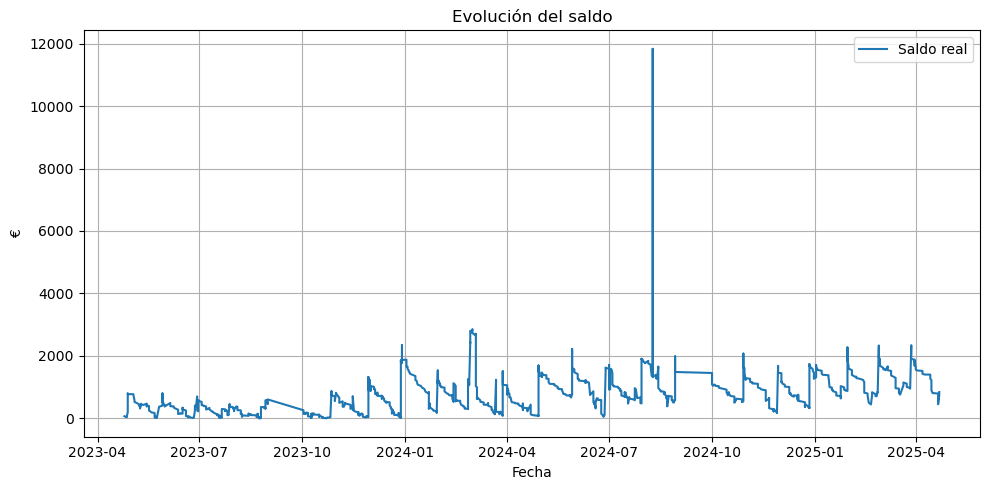

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df_fecha["fecha_operacion"], df_fecha["saldo"], label="Saldo real")
plt.legend()
plt.title("Evolución del saldo")
plt.xlabel("Fecha")
plt.ylabel("€")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# lo guardamos en un nuevo CSV para trabajar sobre el nuevo formato datetime
#df_fecha.to_csv("Movimientos_limpios.csv", index=False)
df_verificacion = pd.read_csv("Movimientos_limpios.csv", parse_dates=['fecha_operacion'])
display(df_verificacion.head())

,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo,año_mes
0,2025-04-22,Transferencia Inmediata De Evelymar Bastidas R...,15.0,840.16,transferencia inmediata de evelymar bastidas r...,ingreso,2025-04
1,2025-04-22,Transferencia Inmediata De Evelymar Bastidas R...,75.0,825.16,transferencia inmediata de evelymar bastidas r...,ingreso,2025-04
2,2025-04-22,Transferencia Inmediata De Evelymar Bastidas R...,300.0,750.16,transferencia inmediata de evelymar bastidas r...,ingreso,2025-04
3,2025-04-21,"Pago Movil En Heladeria Quint, Jinamar, Tarj. ...",-10.6,450.16,pago movil en heladeria quint jinamar tarj,gasto,2025-04
4,2025-04-21,Bizum A Favor De Ruth Santana Gonzalez Concept...,-10.0,460.76,bizum a favor de ruth santana gonzalez concept...,gasto,2025-04


In [9]:
df_verificacion.isnull().sum()

fecha_operacion     0
operacion           0
importe             0
saldo               0
operacion_limpia    0
tipo                0
año_mes             0
dtype: int64

In [10]:
df_categorias = df_verificacion.copy()

In [11]:
# def clasificar_por_reglas(texto):
#     texto = str(texto).lower()

#     #Ingresos
#     if any(p in texto for p in ['transferencia inmediata de', 'transferencia de', 'transferencia recibida']):
#         return 'Ingreso'

    
#     if 'bizum de' in texto:
#         return 'Ingreso'
    
#     # Gastos

#     # Facturas
#     if 'recibo' in texto:
#         return 'Facturas'
    
#     # Préstamos
#     if 'liquidacion periodica' in texto:
#         return 'Prestamo'
    
#     # Transporte
#     gasolina = ['repsol', 'cepsa', 'bp', 'shell', 'gasolinera', 'disa']
#     if any (g in texto for g in gasolina):
#         return 'Transporte'
    
#     if 'guaguas' in texto or 'salcai' in texto or 'global' in texto:
#         return 'Transporte'
    
#     # Restauración
#     restaurantes = ['la sureña', 'goiko', 'vips','heladeria', 'picoteo', 'mc donald', 'burguer king', 'los charcones', 'quinta cumbre', 'bk', 'camaleon', 'tagliatella', 'bar', 'cafeteria', 'food', 'tb metropo', 'compra uber']
#     if any(r in texto for r in restaurantes):
#         return 'Restauracion'
    
#     # Supermercado
#     supermercado = ['mercadona', 'aldi', 'lidl', 'hiperdino', 'carrefour']
#     if any(s in texto for s in supermercado):
#         return 'Supermercado'
    
#     # Cuentas pagadas
#     if 'bizum a' in texto or 'transferencia a' in texto:
#         return 'Transferencia personal'
    
#     # Ocio y suscripciones
#     ocio = ['netflix', 'spotify', 'hbo', 'disney+', 'disney plus', 'amazon prime', 'filmin', 'nintendo', 'game pass']
#     if any(o in texto for o in ocio):
#         return 'Suscripciones'
    
#     # Compras no esenciales
#     compras_no_esenciales = ['mediamarkt', 'media markt', 'fnac', 'ikea', 'leroy merlin', 'decathlon', 'zara', 'shein', 'aliexpress', 'pull&bear', 'stradivarius', 'amazon']
#     if any(c in texto for c in compras_no_esenciales):
#         return 'Compras no esenciales'

#     return 'Sin categorizar'





In [12]:
def clasificar_por_reglas(texto):
    texto = str(texto).lower()

    # Ingresos
    if any(p in texto for p in ['transferencia inmediata de', 'transferencia de', 'transferencia recibida']):
        return 'Ingreso'
    if 'bizum de' in texto:
        return 'Ingreso'

    # Cuentas pagadas / personales
    if 'bizum a' in texto or 'transferencia a' in texto or 'traspaso' in texto:
        return 'Transferencia personal'
    
    # Facturas
    if 'recibo' in texto or 'academia' in texto or 'univ' in texto:
        return 'Facturas'

    # Préstamos
    if 'liquidacion periodica' in texto:
        return 'Préstamo'
    
    # Compras no esenciales
    compras_no_esenciales = [
        'mediamarkt', 'media markt', 'fnac','ikea', 'leroy merlin', 'decathlon',
        'zara', 'shein', 'aliexpress', 'pull&bear', 'stradivarius', 'amazon', 'playstation',
        'viveros', 'zara home', 'idea market', 'playstation', 'tabaco', 'kiwoko',
        'primor', 'agroquimica', 'druni','kiwoko'
    ]
    if any(c in texto for c in compras_no_esenciales):
        return 'Compras no esenciales'

    # Restauración
    restaurantes = [
        'la sureña', 'goiko', 'vips', 'heladeria','pizza', 'hamburguesa','heladería', 'picoteo',
        'mcdonald', 'mc donald', 'burger king', 'burguer king', 'los charcones',
        'quinta cumbre', 'bk', 'camaleon', 'tagliatella', 'bar', 'cafeteria',
        'cafetería', 'food', 'tb metropo', 'compra uber', "llaollao", "compra sumup",
        'pasteleria', 'poke','las casitas', 'gelato', 'cantina', 'nothing', 'oakberry'
    ]
    if any(r in texto for r in restaurantes):
        return 'Restauración'
    
    # Veterinario
    if 'el corral' in texto:
        return 'Veterinario'

    # Supermercado
    supermercado = ['mercadona', 'aldi', 'lidl', 'hiperdino', 'carrefour', 'alcampo']
    if any(s in texto for s in supermercado):
        return 'Supermercado'

    # Suscripciones / ocio
    ocio = ['netflix', 'spotify', 'hbo', 'disney+', 'disney plus', 'amazon prime', 'filmin', 'nintendo', 'game pass', 'cine', 'artesiete']
    if any(o in texto for o in ocio):
        return 'Ocio / Suscripciones'

    
    # Transporte público
    if any(p in texto for p in ['guaguas', 'salcai', 'global']):
        return 'Transporte'

    # Transporte privado / gasolina
    gasolina = ['repsol', 'cepsa', 'bp', 'shell', 'gasolinera', 'disa', 'parking', 'motor telde', 'coche', 'rueda', 'gasolina']
    if any(g in texto for g in gasolina):
        return 'Transporte'


    return 'Sin categorizar'

df_categorias["categoria"] = df_categorias["operacion"].apply(clasificar_por_reglas)
display(df_categorias[df_categorias["categoria"] == "Sin categorizar"])

,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo,año_mes,categoria
7,2025-04-21,"Compra Apple.com/bill, 900812703, Tarjeta 5489...",-9.99,495.46,compra apple com bill tarjeta comision,gasto,2025-04,Sin categorizar
13,2025-04-21,"Pago Movil En Hd Melenara, Telde, Tarj. :*179057",-105.04,687.34,pago movil en hd melenara telde tarj,gasto,2025-04,Sin categorizar
15,2025-04-17,"Compra Apple.com/bill, 900812703, Tarjeta 5489...",-4.99,803.33,compra apple com bill tarjeta comision,gasto,2025-04,Sin categorizar
21,2025-04-14,"Compra Apple.com/bill, Itunes.com, Tarjeta 548...",-3.49,1259.76,compra apple com bill itunes com tarjeta comision,gasto,2025-04,Sin categorizar
22,2025-04-14,"Pago Movil En Fruta Y Verdura, Valsequillo, Ta...",-12.19,1263.25,pago movil en fruta y verdura valsequillo tarj,gasto,2025-04,Sin categorizar
...,...,...,...,...,...,...,...,...
1509,2023-05-12,"Pago Movil En Farmacia Alfons, Valsequillo (, ...",-6.50,427.31,pago movil en farmacia alfons valsequillo tarj,gasto,2023-05,Sin categorizar
1510,2023-05-11,"Pago Movil En Punto Coma, Palmas (las), Tarj. ...",-2.55,433.81,pago movil en punto coma palmas las tarj,gasto,2023-05,Sin categorizar
1515,2023-05-09,"Compra Apple.com/bill, 900812703, Tarjeta 5163...",-8.99,394.82,compra apple com bill tarjeta comision,gasto,2023-05,Sin categorizar
1516,2023-05-08,"Pago Movil En Shalom Restaura, Teror, Tarj. :*...",-7.90,403.81,pago movil en shalom restaura teror tarj,gasto,2023-05,Sin categorizar


In [13]:
# 1 Preparar los datos
df_etiquetado = df_categorias[df_categorias['categoria'] != 'Sin categorizar'].copy()
display(df_etiquetado.sample(10))

,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo,año_mes,categoria
558,2024-06-26,"Compra Spotify P2d361d489, Stockholm, Tarjeta ...",-14.99,65.71,compra spotify pdd stockholm tarjeta comision,gasto,2024-06,Ocio / Suscripciones
1026,2023-12-27,Traspaso: Ahorro Hucha Objetivo: Regalo,-1.37,25.22,traspaso ahorro hucha objetivo regalo,gasto,2023-12,Transferencia personal
675,2024-05-06,"Pago Movil En Gmsa Guaguas, Las Palmas, Tarj. ...",-1.40,1380.11,pago movil en gmsa guaguas las palmas tarj,gasto,2024-05,Transporte
1528,2023-04-28,Transferencia De Fundacion Canaria Universidad...,334.06,793.81,transferencia de fundacion canaria universidad...,ingreso,2023-04,Ingreso
743,2024-04-08,"Compra Playstation Network, Hilversum, Tarjeta...",-8.99,480.65,compra playstation network hilversum tarjeta c...,gasto,2024-04,Compras no esenciales
1397,2023-07-13,"Pago Movil En Cafeteria Paris, Telde, Tarj. :*...",-14.40,198.80,pago movil en cafeteria paris telde tarj,gasto,2023-07,Restauración
1406,2023-07-10,"Pago Movil En Agroquimica Jua, Telde, Tarj. :*...",-10.45,320.00,pago movil en agroquimica jua telde tarj,gasto,2023-07,Compras no esenciales
1508,2023-05-15,Bizum De Debora Vega Ravelo Concepto .,42.00,469.31,bizum de debora vega ravelo concepto,ingreso,2023-05,Ingreso
620,2024-06-03,"Pago Movil En Alcampo Telde, Telde, Tarj. :*17...",-43.05,1373.42,pago movil en alcampo telde telde tarj,gasto,2024-06,Supermercado
629,2024-05-29,Bizum A Favor De Debora Vega Ravelo Concepto: ...,-22.00,1600.67,bizum a favor de debora vega ravelo concepto c...,gasto,2024-05,Transferencia personal


In [14]:
# 2 Separar texto y etiquetas
x_texto = df_etiquetado['operacion_limpia']
y_etiqueta = df_etiquetado['categoria']

In [15]:
# 2. Guardar los textos en una lista para revisarlos luego
textos_originales = x_texto.tolist()

In [16]:
#3 Vectorizar el texto con TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_vect = vectorizer.fit_transform(x_texto)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, x_text_train, x_text_test = train_test_split(
    X_vect, y_etiqueta, textos_originales, test_size=0.2, random_state=42
)


In [18]:
from sklearn.ensemble import RandomForestClassifier

modelo= RandomForestClassifier()
modelo.fit(x_train, y_train)

RandomForestClassifier()

Accuracy 0.9751243781094527
Reporte de clasificación:
                        precision    recall  f1-score   support

 Compras no esenciales       1.00      1.00      1.00        17
              Facturas       1.00      1.00      1.00        17
               Ingreso       1.00      0.98      0.99        48
  Ocio / Suscripciones       1.00      0.86      0.92         7
              Préstamo       1.00      1.00      1.00         2
          Restauración       0.89      1.00      0.94        31
          Supermercado       1.00      0.96      0.98        25
Transferencia personal       0.97      1.00      0.98        32
            Transporte       1.00      0.90      0.95        20
           Veterinario       1.00      1.00      1.00         2

              accuracy                           0.98       201
             macro avg       0.99      0.97      0.98       201
          weighted avg       0.98      0.98      0.98       201



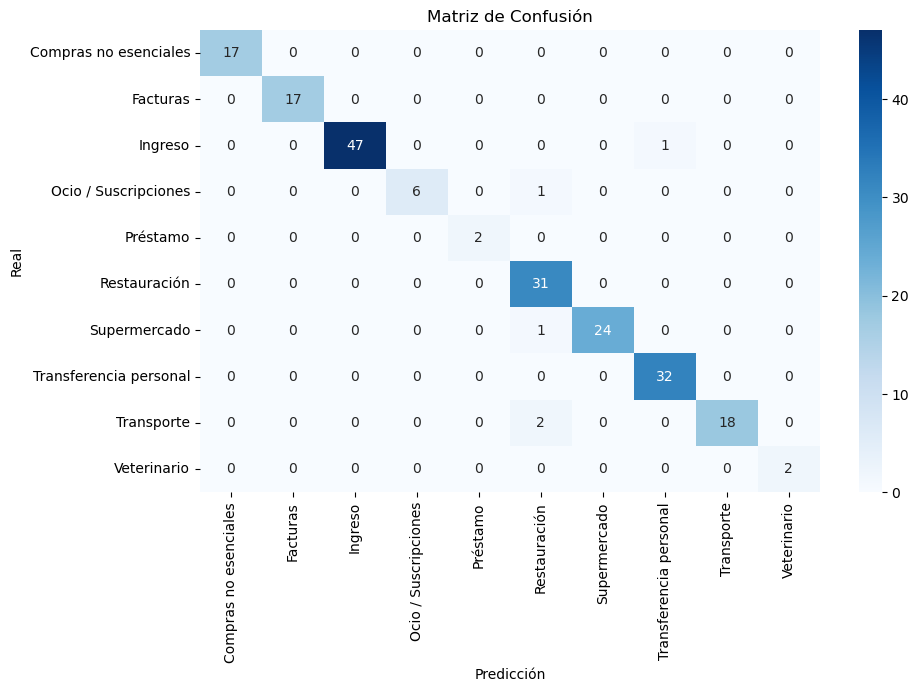

,texto,real,predicho
6,pago movil en mercadona los p telde tarj,Supermercado,Restauración
50,pago movil en parking teror teror tarj,Transporte,Restauración
62,pago movil en yelmo cines ali palmas las tarj,Ocio / Suscripciones,Restauración
127,pago movil en parking palmas de gra tarj,Transporte,Restauración
129,bizum de samuel trujillo santana concepto nesti,Ingreso,Transferencia personal


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predice sobre el conjunto de prueba
y_pred = modelo.predict(x_test)

# Exactitud global
print('Accuracy', accuracy_score(y_test, y_pred))

# Informe por clase
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

# Matriz de confusión 
import seaborn as sns 

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=modelo.classes_, yticklabels=modelo.classes_, cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# 7. Revisar predicciones incorrectas
errores = pd.DataFrame({
    'texto': x_text_test,
    'real': y_test.values,
    'predicho': y_pred
})
errores = errores[errores['real'] != errores['predicho']]

# Mostrar errores
display(errores.head(15))

In [20]:
# Seleccionar solo los movimientos sin categoría
df_sin_etiquetar = df_categorias[df_categorias['categoria'] == 'Sin categorizar'].copy()


In [21]:
# Vectorizar esos nuevos textos con el vectorizer que ya tienes
x_nuevos = vectorizer.transform(df_sin_etiquetar['operacion_limpia'])

In [22]:
# predecir las categorías
df_sin_etiquetar['categoria_predicha'] = modelo.predict(x_nuevos)

In [23]:
# Ver los resultados
display(df_sin_etiquetar[['operacion', 'categoria_predicha']].sample(55))
df_sin_etiquetar.info()
df_sin_etiquetar[df_sin_etiquetar['categoria'] == 'Sin categorizar'].shape[0]


,operacion,categoria_predicha
524,"Compra Ryanair Rhj0, K67x452, Tarjeta 54890103...",Compras no esenciales
647,"Pago Movil En Farmacia Alfons, Valsequillo (, ...",Compras no esenciales
1346,"Ingreso Contra Cuenta, Atm Suc.0153 El 03/08/2...",Transferencia personal
1103,"Pago Movil En La Peatonal, Palmas De Gra, Tarj...",Restauración
875,"Pago Movil En Multiopticas G., Telde, Tarj. :*...",Supermercado
21,"Compra Apple.com/bill, Itunes.com, Tarjeta 548...",Compras no esenciales
1042,"Pago Movil En Manuel Navarro, Las Palmas, Tarj...",Compras no esenciales
51,"Pago Movil En Hd Melenara, Telde, Tarj. :*179057",Supermercado
15,"Compra Apple.com/bill, 900812703, Tarjeta 5489...",Compras no esenciales
1315,"Pago Movil En Spar Bahia Feli, Juan Grande, Ta...",Restauración


<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 7 to 1519
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha_operacion     534 non-null    datetime64[ns]
 1   operacion           534 non-null    object        
 2   importe             534 non-null    float64       
 3   saldo               534 non-null    float64       
 4   operacion_limpia    534 non-null    object        
 5   tipo                534 non-null    object        
 6   año_mes             534 non-null    object        
 7   categoria           534 non-null    object        
 8   categoria_predicha  534 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 41.7+ KB


534

In [24]:
# 4. Actualizar el DataFrame original usando índices
df_categorias.loc[df_sin_etiquetar.index, 'categoria'] = df_sin_etiquetar['categoria_predicha'].values

# 5. Añadir columna origen
df_categorias['origen'] = 'manual'
df_categorias.loc[df_sin_etiquetar.index, 'origen'] = 'modelo'
display(df_categorias.sample(15))
df_categorias[df_categorias['categoria'] == 'Sin categorizar'].shape[0]


,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo,año_mes,categoria,origen
1428,2023-06-30,"Pago Movil En Kiwoko Telde La, Cruz De La Ga, ...",-8.50,574.12,pago movil en kiwoko telde la cruz de la ga tarj,gasto,2023-06,Compras no esenciales,manual
377,2024-08-29,"Pago Movil En Pasteleria Yera, La Estrella, Ta...",-4.50,570.18,pago movil en pasteleria yera la estrella tarj,gasto,2024-08,Restauración,manual
1396,2023-07-14,"Compra La Pizzeria Arinaga, Arinaga, Tarjeta 5...",-23.00,175.80,compra la pizzeria arinaga arinaga tarjeta com...,gasto,2023-07,Restauración,modelo
1137,2023-11-28,Traspaso: Ahorro Hucha Objetivo: Regalo,-0.30,42.23,traspaso ahorro hucha objetivo regalo,gasto,2023-11,Transferencia personal,manual
350,2024-10-14,"Compra Telde Cc Alcampo Pax, Telde, Tarjeta 54...",-31.08,831.69,compra telde cc alcampo pax telde tarjeta comi...,gasto,2024-10,Supermercado,manual
861,2024-03-01,"Pago Movil En Cerveceria Mave, Telde, Tarj. :*...",-29.90,2826.27,pago movil en cerveceria mave telde tarj,gasto,2024-03,Supermercado,modelo
743,2024-04-08,"Compra Playstation Network, Hilversum, Tarjeta...",-8.99,480.65,compra playstation network hilversum tarjeta c...,gasto,2024-04,Compras no esenciales,manual
261,2024-11-25,Bizum De Debora Vega Ravelo Concepto Todo Saldado,70.00,290.96,bizum de debora vega ravelo concepto todo saldado,ingreso,2024-11,Ingreso,manual
874,2024-02-26,"Pago Movil En Martin Valeron, Telde, Tarj. :*1...",-5.90,1162.78,pago movil en martin valeron telde tarj,gasto,2024-02,Supermercado,modelo
1461,2023-06-09,"Compra Internet En Repsol Waylet, Madrid, Tarj...",-28.51,321.85,compra internet en repsol waylet madrid tarj,gasto,2023-06,Transporte,manual


0

In [25]:
# df_categorias.to_csv("Movimientos_categorizados.csv", index=False)

In [26]:
df_categorias = pd.read_csv('Movimientos_categorizados.csv')

In [27]:
df_categorias[df_categorias['origen'] == 'modelo'].head(20)

,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo,año_mes,categoria,origen
7,2025-04-21,"Compra Apple.com/bill, 900812703, Tarjeta 5489...",-9.99,495.46,compra apple com bill tarjeta comision,gasto,2025-04,Compras no esenciales,modelo
13,2025-04-21,"Pago Movil En Hd Melenara, Telde, Tarj. :*179057",-105.04,687.34,pago movil en hd melenara telde tarj,gasto,2025-04,Supermercado,modelo
15,2025-04-17,"Compra Apple.com/bill, 900812703, Tarjeta 5489...",-4.99,803.33,compra apple com bill tarjeta comision,gasto,2025-04,Compras no esenciales,modelo
21,2025-04-14,"Compra Apple.com/bill, Itunes.com, Tarjeta 548...",-3.49,1259.76,compra apple com bill itunes com tarjeta comision,gasto,2025-04,Compras no esenciales,modelo
22,2025-04-14,"Pago Movil En Fruta Y Verdura, Valsequillo, Ta...",-12.19,1263.25,pago movil en fruta y verdura valsequillo tarj,gasto,2025-04,Compras no esenciales,modelo
24,2025-04-14,"Pago Movil En E.s. Las Terraz, Hornos Del Re, ...",-10.00,1322.79,pago movil en e s las terraz hornos del re tarj,gasto,2025-04,Supermercado,modelo
26,2025-04-14,"Pago Movil En Domyhome, Telde, Tarj. :*179057",-1.50,1399.46,pago movil en domyhome telde tarj,gasto,2025-04,Supermercado,modelo
28,2025-04-07,"Compra Nyx*airservspain, Sansebastiand, Tarjet...",-1.00,1422.96,compra nyx airservspain sansebastiand tarjeta ...,gasto,2025-04,Compras no esenciales,modelo
29,2025-04-07,"Pago Movil En La Surena, Palmas De Gra, Tarj. ...",-5.00,1423.96,pago movil en la surena palmas de gra tarj,gasto,2025-04,Restauración,modelo
40,2025-03-31,"Pago Movil En Panera, Valsequillo, Tarj. :*179057",-8.95,1756.56,pago movil en panera valsequillo tarj,gasto,2025-03,Compras no esenciales,modelo


# Prediccion del gasto / ingreso



In [28]:
df_gasto = df_categorias[df_categorias['tipo'] == 'gasto'].copy()
gastos_mensuales = df_gasto.groupby(['año_mes', 'categoria'])['importe'].sum().unstack(fill_value=0)
display(gastos_mensuales)

categoria,Compras no esenciales,Facturas,Ocio / Suscripciones,Préstamo,Restauración,Supermercado,Transferencia personal,Transporte,Veterinario
año_mes,,,,,,,,,
2023-04,-8.05,0.00,0.00,0.00,-4.10,-11.68,0.00,-28.82,0.00
2023-05,-132.59,-229.93,-9.99,0.00,-72.45,-399.89,-240.50,-143.03,-225.11
2023-06,-102.93,-205.43,-9.99,0.00,-18.88,-205.03,-542.93,-155.05,-14.07
2023-07,-196.37,-123.72,-19.79,0.00,-101.69,-320.23,-171.62,-174.19,0.00
2023-08,-69.43,-58.43,-9.99,0.00,-226.96,-252.01,-186.59,-195.19,0.00
2023-10,-178.25,-58.43,-10.99,0.00,-191.50,-384.87,-212.70,-45.57,0.00
2023-11,-689.95,-155.83,-46.89,0.00,-340.47,-314.22,-593.98,-154.26,0.00
2023-12,-490.36,-174.58,-32.79,0.00,-429.89,-335.84,-541.00,-183.70,0.00
2024-01,-599.46,-173.39,-14.99,0.00,-156.85,-297.71,-1086.98,-76.72,0.00


In [29]:
# Se usará prophet modelo de Meta para realizar predicciones  de series temporales 
df_gasto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 3 to 1533
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha_operacion   1296 non-null   object 
 1   operacion         1296 non-null   object 
 2   importe           1296 non-null   float64
 3   saldo             1296 non-null   float64
 4   operacion_limpia  1296 non-null   object 
 5   tipo              1296 non-null   object 
 6   año_mes           1296 non-null   object 
 7   categoria         1296 non-null   object 
 8   origen            1296 non-null   object 
dtypes: float64(2), object(7)
memory usage: 101.2+ KB


In [30]:
# Preparar datos para Prophet para compras no escenciales
from prophet import Prophet
df_prophet = gastos_mensuales['Compras no esenciales'].reset_index()
df_prophet.columns = ['ds','y']
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Se crea y entrena Prophet
modelo_prophet = Prophet()
modelo_prophet.fit(df_prophet)

# Generar fechas futuras y predecir
futuro = modelo_prophet.make_future_dataframe(periods = 6, freq='M')
forecast = modelo_prophet.predict(futuro)

# Mostrar predicciones
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
16:51:20 - cmdstanpy - INFO - Chain [1] start processing
16:51:20 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
0,2023-04-01,-221.985971,-613.381225,208.908243
1,2023-05-01,-413.454522,-857.388897,2.243366
2,2023-06-01,-318.638813,-772.366010,108.214920
3,2023-07-01,-331.002867,-743.624248,113.515150
4,2023-08-01,-123.890032,-576.490058,302.240953
5,2023-10-01,-145.533429,-564.714359,305.970527
6,2023-11-01,-673.380392,-1103.371745,-271.939468
7,2023-12-01,-528.004834,-940.183253,-86.267907
8,2024-01-01,-715.330638,-1174.359832,-291.854749
9,2024-02-01,-468.410991,-859.725682,0.269265


In [31]:
# 1. Selección y formateo de la categoría
df_prophet = gastos_mensuales['Compras no esenciales'].reset_index()
df_prophet.columns = ['ds','y']
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_prophet['y'] = df_prophet['y'].abs()

# 2. Guardar valores reales de enero a abril de 2025
reales = df_prophet[df_prophet['ds'] > '2024-12-31'][['ds', 'y']]
reales['ds'] = reales['ds'] + pd.offsets.MonthEnd(0)  # para alinear con Prophet

# 3. Filtrar entrenamiento hasta diciembre 2024
# Calcular la mediana sin el valor atípico
mediana = df_prophet[df_prophet['ds'] != '2024-03-01']['y'].median()

# Reemplazar el valor atípico
df_prophet.loc[df_prophet['ds'] == '2024-03-01', 'y'] = mediana
df_entrenamiento = df_prophet[df_prophet['ds'] <= '2024-12-31'].copy()

# 4. Crear y entrenar el modelo
modelo_prophet = Prophet(
    changepoint_prior_scale=0.01,
    seasonality_mode='multiplicative',
    interval_width=0.95
)
modelo_prophet.fit(df_entrenamiento)


# 5. Predecir 4 meses futuros
futuro = modelo_prophet.make_future_dataframe(periods=5, freq='ME')
forecast = modelo_prophet.predict(futuro)

# 6. Seleccionar predicciones futuras
forecast_test = forecast[forecast['ds'] > '2024-12-31'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# 7. Comparar con los datos reales
comparacion = pd.merge(forecast_test, reales, on='ds', how='left')
comparacion = comparacion[['ds', 'yhat', 'y','yhat_lower', 'yhat_upper']]
comparacion = comparacion.rename(columns={
    'ds': 'Fecha',
    'yhat': 'Predicción (€)',
    'yhat_lower': 'Límite inferior (€)',
    'yhat_upper': 'Límite superior (€)',
    'y': 'Real (€)'
})

# 8. Mostrar resultados
pd.set_option('display.float_format', '{:,.2f}'.format)
display(comparacion)

from sklearn.metrics import mean_absolute_error

mae_prophet = mean_absolute_error(comparacion['Real (€)'], comparacion['Predicción (€)'])
print(f"✅ MAE Prophet: {mae_prophet:.2f} €")



16:51:20 - cmdstanpy - INFO - Chain [1] start processing
16:51:20 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,484.16,154.84,131.78,876.71
1,2025-02-28,496.96,115.06,114.86,885.79
2,2025-03-31,511.12,107.51,167.33,893.45
3,2025-04-30,524.83,216.29,179.84,896.51


✅ MAE Prophet: 355.84 €


In [32]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

# ========================
# 1. Preparar la serie
# ========================

serie = gastos_mensuales['Compras no esenciales'].copy()

# Convertir índice a datetime si es str (caso de año_mes tipo '2023-04')
if not isinstance(serie.index, pd.DatetimeIndex):
    serie.index = pd.to_datetime(serie.index)

# Asegurar orden y frecuencia mensual
serie = serie.sort_index()
serie = serie.asfreq('MS')  # frecuencia mensual start of month

# ===============================
# 2. Reemplazar el valor atípico (2024-03-01) por la mediana
# ===============================
mediana = serie[serie.index != '2024-03-01'].median()
serie.loc['2024-03-01'] = mediana

# ========================
# 2. Entrenar con datos hasta dic 2024
# ========================
serie_entrenamiento = serie['2023-04-01':'2024-12-01'].abs()
modelo_arima = ARIMA(serie_entrenamiento, order=(1, 1, 1))
modelo_fit = modelo_arima.fit()

# ========================
# 3. Predecir enero-abril 2025
# ========================
predicciones = modelo_fit.forecast(steps=4)
fechas_pred = pd.date_range(start='2025-01-01', periods=4, freq='MS')
predicciones.index = fechas_pred

# ========================
# 4. Reales
# ========================
serie_reales = serie['2025-01-01':'2025-04-01'].abs()
serie_reales = serie_reales.reindex(fechas_pred)

# ========================
# 5. Tabla comparativa
# ========================
comparacion = pd.DataFrame({
    'Fecha': fechas_pred,
    'Predicción ARIMA (€)': predicciones.values,
    'Real (€)': serie_reales.values
})

pd.set_option('display.float_format', '{:,.2f}'.format)
display(comparacion)

from sklearn.metrics import mean_absolute_error

# Calcular error absoluto medio
mae_arima = mean_absolute_error(comparacion['Real (€)'], comparacion['Predicción ARIMA (€)'])

print(f"✅ MAE ARIMA tras ajuste: {mae_arima:.2f} €")



,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,399.80,154.84
1,2025-02-01,381.35,115.06
2,2025-03-01,378.81,107.51
3,2025-04-01,378.45,216.29


✅ MAE ARIMA tras ajuste: 236.18 €


In [36]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import pandas as pd

def predecir_categoria_con_prophet(nombre_categoria):
    # 1. Selección y formateo de la categoría
    df_prophet = gastos_mensuales[nombre_categoria].reset_index()
    df_prophet.columns = ['ds', 'y']
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
    df_prophet['y'] = df_prophet['y'].abs()

    print(f'Prophet - categoría:{nombre_categoria}')
    # 2. Guardar valores reales de enero a abril de 2025
    reales = df_prophet[df_prophet['ds'] > '2024-12-31'][['ds', 'y']]
    reales['ds'] = reales['ds'] + pd.offsets.MonthEnd(0)  # Alinear con Prophet

    # 3. 
    df_entrenamiento = df_prophet[df_prophet['ds'] <= '2024-12-31'].copy()

    # 4. Crear y entrenar el modelo Prophet
    modelo_prophet = Prophet(
        changepoint_prior_scale=0.1,
        seasonality_mode='multiplicative',
        interval_width=0.95
    )
    modelo_prophet.fit(df_entrenamiento)

    # 5. Predecir 4 meses futuros
    futuro = modelo_prophet.make_future_dataframe(periods=5, freq='ME')
    forecast = modelo_prophet.predict(futuro)

    # 6. Seleccionar predicciones futuras
    forecast_test = forecast[forecast['ds'] > '2024-12-31'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # 7. Comparar con los datos reales
    comparacion = pd.merge(forecast_test, reales, on='ds', how='left')
    comparacion = comparacion[['ds', 'yhat', 'y', 'yhat_lower', 'yhat_upper']]
    comparacion = comparacion.rename(columns={
        'ds': 'Fecha',
        'yhat': 'Predicción (€)',
        'yhat_lower': 'Límite inferior (€)',
        'yhat_upper': 'Límite superior (€)',
        'y': 'Real (€)'
    })

    # 8. Mostrar resultados y MAE
    pd.set_option('display.float_format', '{:,.2f}'.format)
    display(comparacion)
 
    mae_prophet = mean_absolute_error(comparacion['Real (€)'], comparacion['Predicción (€)'])
    print(f"✅ MAE Prophet para '{nombre_categoria}': {mae_prophet:.2f} €")


predecir_categoria_con_prophet('Transferencia personal')
predecir_categoria_con_prophet('Compras no esenciales')
predecir_categoria_con_prophet('Facturas')
predecir_categoria_con_prophet('Préstamo')
predecir_categoria_con_prophet('Ocio / Suscripciones')
predecir_categoria_con_prophet('Veterinario')
predecir_categoria_con_prophet('Restauración')
predecir_categoria_con_prophet('Supermercado')
predecir_categoria_con_prophet('Transporte')


16:52:17 - cmdstanpy - INFO - Chain [1] start processing
16:52:17 - cmdstanpy - INFO - Chain [1] done processing


Prophet - categoría:Transferencia personal


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,"2,627.75",402.50,"-1,702.46","7,087.10"
1,2025-02-28,"2,740.60",409.00,"-1,987.58","7,381.76"
2,2025-03-31,"2,865.54",688.40,"-1,696.71","7,972.33"
3,2025-04-30,"2,986.45",10.00,"-1,691.47","7,545.45"


16:52:17 - cmdstanpy - INFO - Chain [1] start processing
16:52:17 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Transferencia personal': 2427.61 €
Prophet - categoría:Compras no esenciales


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,665.60,154.84,-440.09,"1,786.81"
1,2025-02-28,682.46,115.06,-327.09,"1,674.96"
2,2025-03-31,701.13,107.51,-347.72,"1,743.93"
3,2025-04-30,719.19,216.29,-293.96,"1,764.58"


16:52:17 - cmdstanpy - INFO - Chain [1] start processing


✅ MAE Prophet para 'Compras no esenciales': 543.67 €
Prophet - categoría:Facturas


16:52:17 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,308.85,510.23,65.14,550.11
1,2025-02-28,317.37,565.70,85.54,547.87
2,2025-03-31,326.79,510.98,81.56,589.43
3,2025-04-30,335.91,510.98,95.04,576.93


16:52:18 - cmdstanpy - INFO - Chain [1] start processing
16:52:18 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Facturas': 202.24 €
Prophet - categoría:Préstamo


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,167.03,197.19,-38.66,355.70
1,2025-02-28,176.53,197.19,-26.25,380.82
2,2025-03-31,187.05,0.00,-11.04,388.87
3,2025-04-30,197.23,197.19,3.38,401.72


16:52:18 - cmdstanpy - INFO - Chain [1] start processing
16:52:18 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Préstamo': 59.48 €
Prophet - categoría:Ocio / Suscripciones


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,28.54,14.99,8.32,48.24
1,2025-02-28,29.20,14.99,9.22,50.49
2,2025-03-31,29.93,14.99,10.82,51.02
3,2025-04-30,30.63,0.00,9.47,50.17


16:52:18 - cmdstanpy - INFO - Chain [1] start processing
16:52:18 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Ocio / Suscripciones': 18.33 €
Prophet - categoría:Veterinario


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,-8.96,137.36,-116.12,101.58
1,2025-02-28,-11.47,206.49,-118.67,105.06
2,2025-03-31,-14.25,0.00,-116.10,89.63
3,2025-04-30,-16.94,0.00,-125.40,83.71


16:52:18 - cmdstanpy - INFO - Chain [1] start processing
16:52:18 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Veterinario': 98.87 €
Prophet - categoría:Restauración


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,290.16,71.03,-5.26,592.98
1,2025-02-28,295.70,135.30,11.70,579.28
2,2025-03-31,301.85,226.40,30.16,579.77
3,2025-04-30,307.79,130.52,-4.24,587.06


16:52:18 - cmdstanpy - INFO - Chain [1] start processing
16:52:18 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Restauración': 158.06 €
Prophet - categoría:Supermercado


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,421.74,370.80,232.38,598.32
1,2025-02-28,429.17,223.23,262.19,622.82
2,2025-03-31,437.41,319.68,251.84,614.20
3,2025-04-30,445.38,282.11,267.58,617.99


16:52:19 - cmdstanpy - INFO - Chain [1] start processing
16:52:19 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Supermercado': 134.47 €
Prophet - categoría:Transporte


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,98.70,33.25,-44.98,232.73
1,2025-02-28,97.04,74.14,-38.43,219.14
2,2025-03-31,95.21,60.00,-41.70,231.03
3,2025-04-30,93.43,36.25,-36.92,224.58


✅ MAE Prophet para 'Transporte': 45.18 €


In [34]:
df_categorias['categoria'].unique()

array(['Ingreso', 'Restauración', 'Transferencia personal',
       'Compras no esenciales', 'Supermercado', 'Facturas', 'Transporte',
       'Préstamo', 'Ocio / Suscripciones', 'Veterinario'], dtype=object)

In [37]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import pandas as pd

def predecir_categoria_con_arima(nombre_categoria):
    print(f"Arima - categoría: {nombre_categoria}")

    # 1. Selección de la serie
    serie = gastos_mensuales[nombre_categoria].copy()

    # 2. Asegurar tipo datetime y frecuencia mensual
    if not isinstance(serie.index, pd.DatetimeIndex):
        serie.index = pd.to_datetime(serie.index)
    serie = serie.sort_index().asfreq('MS')

    # 3. Entrenamiento hasta dic 2024
    serie_entrenamiento = serie['2023-04-01':'2024-12-01'].abs()

    # Entrenar modelo ARIMA
    modelo_arima = ARIMA(serie_entrenamiento, order=(1, 1, 1))
    modelo_fit = modelo_arima.fit()

    # 5. Predecir 4 meses futuros
    predicciones = modelo_fit.forecast(steps=4)
    fechas_pred = pd.date_range(start='2025-01-01', periods=4, freq='MS')
    predicciones.index = fechas_pred

    # 6. Obtener valores reales de esos meses
    serie_reales = serie['2025-01-01':'2025-04-01'].abs().reindex(fechas_pred)

    # 7. Comparar y mostrar resultados
    comparacion = pd.DataFrame({
        'Fecha': fechas_pred,
        'Predicción ARIMA (€)': predicciones.values,
        'Real (€)': serie_reales.values
    })

    pd.set_option('display.float_format', '{:,.2f}'.format)
    display(comparacion)

    # 8. Calcular MAE
    mae_arima = mean_absolute_error(comparacion['Real (€)'], comparacion['Predicción ARIMA (€)'])
    print(f"✅ MAE ARIMA para '{nombre_categoria}': {mae_arima:.2f} €")

predecir_categoria_con_arima('Restauración')
predecir_categoria_con_arima('Supermercado')
predecir_categoria_con_arima('Transporte')
predecir_categoria_con_arima('Transferencia personal')


Arima - categoría: Restauración


,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,110.04,71.03
1,2025-02-01,165.11,135.30
2,2025-03-01,132.03,226.40
3,2025-04-01,151.90,130.52


✅ MAE ARIMA para 'Restauración': 46.15 €
Arima - categoría: Supermercado


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,365.53,370.80
1,2025-02-01,359.78,223.23
2,2025-03-01,361.16,319.68
3,2025-04-01,360.83,282.11


✅ MAE ARIMA para 'Supermercado': 65.50 €
Arima - categoría: Transporte


,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,122.66,33.25
1,2025-02-01,120.23,74.14
2,2025-03-01,120.10,60.00
3,2025-04-01,120.09,36.25


✅ MAE ARIMA para 'Transporte': 69.86 €
Arima - categoría: Transferencia personal


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,879.90,402.50
1,2025-02-01,"1,091.85",409.00
2,2025-03-01,"1,161.93",688.40
3,2025-04-01,"1,185.11",10.00


✅ MAE ARIMA para 'Transferencia personal': 702.22 €
